#Collecting Data

Data ini diambil dari kaggle https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

#Preparing Dataset

1. Importing necessary library
2. Filtering dataset (surabaya only)
3. Cleaning unnecessary variable
4. Exploratory data analysis

#Importing necessary library


In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import random
import json

#Filtering Dataset (Surabaya Only)

In [2]:
# #importing dataset from api
# getPlace = requests.get("https://newapi.thisiswasyrof.works/v1/master/get-tour-destination").json()
# getRating = requests.get("https://newapi.thisiswasyrof.works/v1/master/get-ratings").json()

# place = pd.json_normalize(getPlace['data'])
place = pd.read_csv("https://thisiswasyrof.works/file/data_wisata.csv", delimiter=';')
rating = pd.read_csv("https://thisiswasyrof.works/file/new_rating.csv")

# rating = pd.json_normalize(getRating['data'])

print(place.head())


    id  tour_categories_id                   name  phone  email  price  score  \
0  393                   1  Taman Harmoni Keputih    NaN    NaN      0    4.4   
1  394                   2      Air Mancur Menari    NaN    NaN  35000    4.4   
2  395                   2         Taman Prestasi    NaN    NaN      0    4.6   
3  396                   3    Monumen Kapal Selam    NaN    NaN  15000    4.4   
4  397                   2    Taman Kunang-Kunang    NaN    NaN      0    4.4   

                                         description         address  \
0  Tempat tersebut ialah Taman Hatmoni Keputih Su...  Surabaya Timur   
1  Jembatan Kenjeran dengan air mancur menarinya ...  Surabaya Utara   
2  Taman Prestasi Surabaya merupakan salah satu t...  Surabaya Pusat   
3  Monumen Kapal Selam, atau disingkat Monkasel, ...  Surabaya Pusat   
4  Taman Kunang – Kunang di Surabaya ini mempunya...  Surabaya Utara   

       longitude                latitude  day_open_start  day_open_end  \
0  1.1

In [3]:
print(rating.head())

   user_id  tourist_destination_id  score  review
0        1                     393      5     NaN
1        6                     393      2     NaN
2        8                     393      5     NaN
3       19                     393      3     NaN
4       27                     393      3     NaN


#Explanatory data analysis

In [4]:
top_15 = rating['tourist_destination_id'].value_counts().reset_index()[0:15]
top_15 = pd.merge(top_15, place[['id', 'name']], how='left', left_on='index', right_on='id')
print(top_15)

    index  tourist_destination_id   id                             name
0     402                      33  402      Food Junction Grand Pakuwon
1     430                      32  430           Atlantis Land Surabaya
2     416                      31  416                 Keraton Surabaya
3     406                      29  406             Kebun Bibit Wonorejo
4     427                      28  427         Patung Buddha Empat Rupa
5     398                      28  398              Taman Buah Surabaya
6     405                      27  405              Surabaya North Quay
7     424                      26  424              Pantai Ria Kenjeran
8     407                      26  407  Taman Ekspresi Dan Perpustakaan
9     417                      26  417          Kelenteng Sanggar Agung
10    434                      25  434                    Taman Bungkul
11    423                      24  423            Patung Sura dan Buaya
12    428                      24  428   Monumen Bambu Runcing S

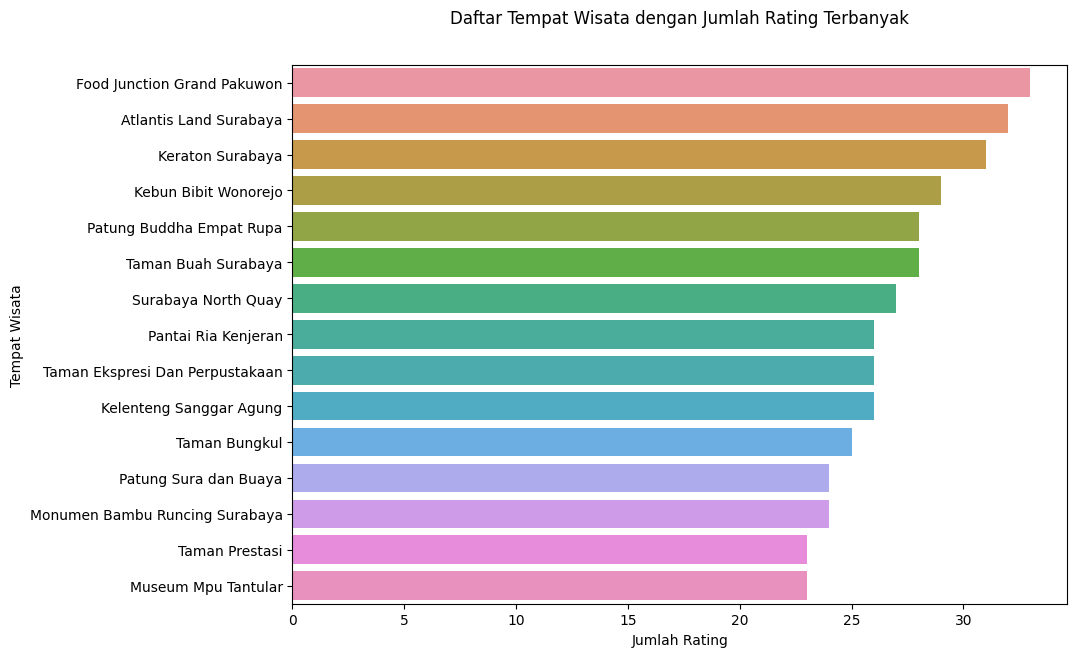

In [5]:
#Displaying the plot
plt.figure(figsize=(10, 7))
sns.barplot(x='tourist_destination_id', y='name', data=top_15)
plt.title('Daftar Tempat Wisata dengan Jumlah Rating Terbanyak', pad=30)
plt.xlabel('Jumlah Rating')
plt.ylabel('Tempat Wisata')
plt.show()

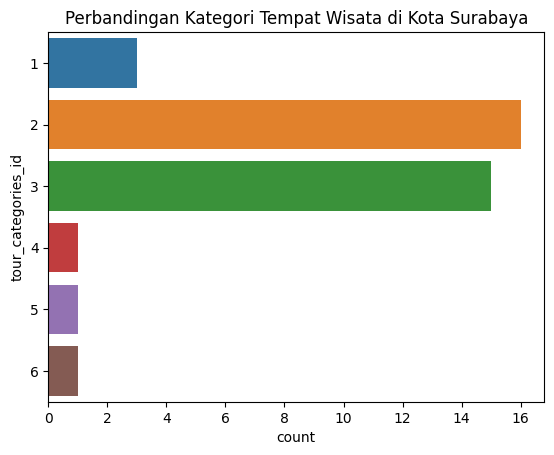

In [6]:
#Displaying the comparison of the destination categories in the Surabaya
sns.countplot(y='tour_categories_id', data=place)
plt.title('Perbandingan Kategori Tempat Wisata di Kota Surabaya')
plt.show()


# Modelling Content Based Filtering

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [8]:
td = TfidfVectorizer(stop_words='english')
tfidf_matrix = td.fit_transform(place['description'])
tfidf_matrix.shape

(37, 1379)

In [9]:
#Computing the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim

array([[1.        , 0.11145777, 0.18330884, ..., 0.15911774, 0.05445854,
        0.23736041],
       [0.11145777, 1.        , 0.09358847, ..., 0.18887063, 0.37824286,
        0.08520019],
       [0.18330884, 0.09358847, 1.        , ..., 0.24934841, 0.08070536,
        0.21838485],
       ...,
       [0.15911774, 0.18887063, 0.24934841, ..., 1.        , 0.15111992,
        0.24053191],
       [0.05445854, 0.37824286, 0.08070536, ..., 0.15111992, 1.        ,
        0.06264978],
       [0.23736041, 0.08520019, 0.21838485, ..., 0.24053191, 0.06264978,
        1.        ]])

In [10]:
#Construct a reverse map of indices and movie title
indicate = pd.Series(place.index, index=place['name']).drop_duplicates()

In [11]:
#Function that takes in place name as input and outputs most similar destination
def recommendation(Place_name, cosine_sim=cosine_sim):
  idx = indicate[Place_name]
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:11]
  destination_indicate = [i[0] for i in sim_scores]
  return place['name'].iloc[destination_indicate]

In [12]:
#randoming place
placeName = random.choice(place['name'])
print(placeName)
# Giving destination recomendation from place that input from user
modelc=recommendation(placeName)

Taman Pelangi


In [13]:
modelc

36      Taman Flora Bratang Surabaya
12              Kebun Bibit Wonorejo
2                     Taman Prestasi
9                   Taman Barunawati
34                     Taman Bungkul
5                Taman Buah Surabaya
0              Taman Harmoni Keputih
32                       Taman Mundu
31                          2 Rakyat
21    Surabaya Museum (Gedung Siola)
Name: name, dtype: object


# Collaborative Based Filtering


In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import optimizers

In [15]:
#Filtering data
min_place_rating = 20
filter_place = (rating["tourist_destination_id"].value_counts()>min_place_rating)
filter_place = filter_place[filter_place].index.tolist()

min_user_rating =3
filter_user = (rating["user_id"].value_counts()>min_user_rating)
filter_user = filter_user[filter_user].index.tolist()

filtered_data = rating[(rating["tourist_destination_id"].isin(filter_place)) & (rating["user_id"]).isin(filter_user)]
print(rating.shape)
print(filtered_data.shape)
print(filtered_data)

(837, 4)
(330, 4)
     user_id  tourist_destination_id  score  review
1          6                     393      2     NaN
3         19                     393      3     NaN
8         82                     393      5     NaN
11       131                     393      3     NaN
12       131                     393      4     NaN
..       ...                     ...    ...     ...
811      219                     424      1     NaN
813      265                     424      3     NaN
814      272                     424      3     NaN
815      284                     424      2     NaN
816      297                     424      2     NaN

[330 rows x 4 columns]


In [16]:
#Copy filtered data to another dataset
df = filtered_data.copy()
df

,user_id,tourist_destination_id,score,review
1,6,393,2,NaN
3,19,393,3,NaN
8,82,393,5,NaN
11,131,393,3,NaN
12,131,393,4,NaN
...,...,...,...,...
811,219,424,1,NaN
813,265,424,3,NaN
814,272,424,3,NaN
815,284,424,2,NaN


Doing the Encoding Dataset

In [17]:
#Preprocessing to change the User_ID without the same value
user_ids = df['user_id'].unique().tolist()
print('list User_id: ', user_ids)

#Encoding User_Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id: ', user_to_user_encoded)

#Encoding value to User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded value to User_Id: ', user_encoded_to_user)


list User_id:  [6, 19, 82, 131, 184, 255, 261, 58, 84, 91, 146, 157, 167, 204, 228, 265, 278, 123, 179, 227, 242, 282, 283, 5, 210, 226, 259, 268, 272, 285, 299, 93, 112, 118, 166, 187, 194, 83, 94, 217, 224, 9, 13, 17, 43, 55, 116, 142, 175, 262, 295, 76, 80, 101, 173, 198, 248, 274, 284, 49, 106, 178, 188, 209, 216, 220, 286, 40, 74, 130, 150, 28, 121, 202, 287, 77, 122, 136, 257, 269, 154, 191, 124, 65, 297, 33, 206, 267, 149, 219]
encoded user_id:  {6: 0, 19: 1, 82: 2, 131: 3, 184: 4, 255: 5, 261: 6, 58: 7, 84: 8, 91: 9, 146: 10, 157: 11, 167: 12, 204: 13, 228: 14, 265: 15, 278: 16, 123: 17, 179: 18, 227: 19, 242: 20, 282: 21, 283: 22, 5: 23, 210: 24, 226: 25, 259: 26, 268: 27, 272: 28, 285: 29, 299: 30, 93: 31, 112: 32, 118: 33, 166: 34, 187: 35, 194: 36, 83: 37, 94: 38, 217: 39, 224: 40, 9: 41, 13: 42, 17: 43, 43: 44, 55: 45, 116: 46, 142: 47, 175: 48, 262: 49, 295: 50, 76: 51, 80: 52, 101: 53, 173: 54, 198: 55, 248: 56, 274: 57, 284: 58, 49: 59, 106: 60, 178: 61, 188: 62, 209: 6

In [18]:
#Changing the "Place_Id" to List without the same value
place_ids = df['tourist_destination_id'].unique().tolist()
print('list place_id: ', place_ids)

#Encoding "Place_Id"
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded place_id: ', place_to_place_encoded)

#Encoding value to "Place_Id"
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded value to place_id: ', place_encoded_to_place )

list place_id:  [393, 405, 428, 407, 426, 421, 406, 436, 395, 434, 397, 433, 398, 410, 402, 417, 416, 430, 429, 422, 414, 400, 427, 423, 431, 424]
encoded place_id:  {393: 0, 405: 1, 428: 2, 407: 3, 426: 4, 421: 5, 406: 6, 436: 7, 395: 8, 434: 9, 397: 10, 433: 11, 398: 12, 410: 13, 402: 14, 417: 15, 416: 16, 430: 17, 429: 18, 422: 19, 414: 20, 400: 21, 427: 22, 423: 23, 431: 24, 424: 25}
encoded value to place_id:  {0: 393, 1: 405, 2: 428, 3: 407, 4: 426, 5: 421, 6: 406, 7: 436, 8: 395, 9: 434, 10: 397, 11: 433, 12: 398, 13: 410, 14: 402, 15: 417, 16: 416, 17: 430, 18: 429, 19: 422, 20: 414, 21: 400, 22: 427, 23: 423, 24: 431, 25: 424}


In [19]:
#Mapping User_Id to dataframe
df['user'] =df['user_id'].map(user_to_user_encoded)

#Mapping Place_Id to dataframe
df['place']=df['tourist_destination_id'].map(place_to_place_encoded)

In [20]:
num_users = len(user_to_user_encoded)
num_places = len(place_to_place_encoded)
min_rating = min(df['score'])
max_rating = max(df['score'])

df['score'] = df['score'].values.astype(np.float32)

print(num_users, num_places, min_rating, max_rating)

90 26 1 5


In [21]:
df=df.sample(frac=1, random_state=42).iloc[:1000,:]
df

,user_id,tourist_destination_id,score,review,user,place
25,58,405,2.0,NaN,7,1
330,6,410,2.0,NaN,0,13
273,136,433,2.0,NaN,77,11
104,112,426,5.0,NaN,32,4
187,274,436,4.0,NaN,57,7
...,...,...,...,...,...,...
379,259,402,3.0,NaN,26,14
154,116,406,2.0,NaN,46,6
210,220,395,2.0,NaN,65,8
614,116,400,4.0,NaN,46,21


In [22]:
#Splitting data train and test
x = df[['user','place']].values
y=df['score'].apply(lambda x:(x-min_rating)/(max_rating-min_rating)).values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(264, 2)
(66, 2)
(264,)
(66,)


In [24]:
user_id_input = tf.keras.layers.Input(shape=[1], name="user_id_input")
place_id_input = tf.keras.layers.Input(shape=[1], name="place_id_input")

user_embedding = tf.keras.layers.Embedding(output_dim = 10,
                                           input_dim=num_users+1,
                                           input_length = 1,
                                           name = "user_embedding")(user_id_input)
place_embedding = tf.keras.layers.Embedding(output_dim = 20,
                                            input_dim = num_places+1,
                                            input_length = 1,
                                           name = "place_embedding")(place_id_input)

user_vec = tf.keras.layers.Flatten(name ="flatten-user")(user_embedding)
place_vec = tf.keras.layers.Flatten(name ="flatten-place")(place_embedding)

In [25]:
#Model
concat = tf.keras.layers.Concatenate()([user_vec, place_vec])

fc1 = tf.keras.layers.Dense(128, activation='relu')(concat)
fc2 = tf.keras.layers.Dense(64, activation='relu')(fc1)
fc3 = tf.keras.layers.Dense(16, activation='relu')(fc2)
y = tf.keras.layers.Dense(1)(fc3)

model = tf.keras.models.Model(inputs=[user_id_input, place_id_input], outputs=y)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum = 0.9),
              loss = tf.losses.mean_squared_error,
              metrics =[tf.keras.metrics.RootMeanSquaredError()]
)

history = model.fit(x = [x_train[:,0], x_train[:,1]],
                    y = y_train,
                    validation_data =([x_test[:,0], x_test[:,1]], y_test),
                    epochs = 100,
                    verbose=1)

Epoch 1/100
9/9 [==============================] - 1s 36ms/step - loss: 0.3442 - root_mean_squared_error: 0.5867 - val_loss: 0.3373 - val_root_mean_squared_error: 0.5807
Epoch 2/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2725 - root_mean_squared_error: 0.5220 - val_loss: 0.2465 - val_root_mean_squared_error: 0.4965
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1918 - root_mean_squared_error: 0.4379 - val_loss: 0.1758 - val_root_mean_squared_error: 0.4193
Epoch 4/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1448 - root_mean_squared_error: 0.3805 - val_loss: 0.1426 - val_root_mean_squared_error: 0.3776
Epoch 5/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1263 - root_mean_squared_error: 0.3554 - val_loss: 0.1322 - val_root_mean_squared_error: 0.3636
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 0.1231 - root_mean_squared_error: 0.3509 - val_loss: 0.1292 - val_root_mean_squared

In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user_id_input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 place_id_input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 10)        910         ['user_id_input[0][0]']          
                                                                                                  
 place_embedding (Embedding)    (None, 1, 20)        540         ['place_id_input[0][0]']         
                                                                                              

In [27]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

<function matplotlib.pyplot.show(close=None, block=None)>

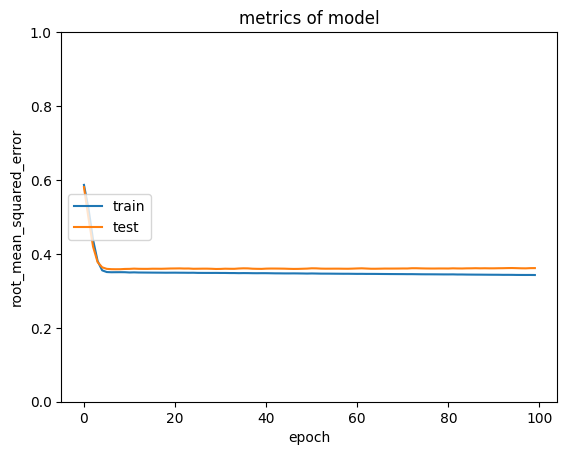

In [28]:
#showing the plot of residual
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('metrics of model')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=1)
plt.legend(['train','test'], loc='center left')
plt.show

In [29]:
place_df = place[['id', 'name','tour_categories_id', 'score', 'price']]
place_df.columns = ['id','place_name','category','rating','price']
df=filtered_data.copy()

user_id = df.user_id.sample(1).iloc[0]
place_visited_by_user = df[df.user_id == user_id]

place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.tourist_destination_id.values)]['id']
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

print(user_place_array.shape)
ratings= model.predict([user_place_array[:,0], user_place_array[:,1]]).flatten()

(23, 2)
1/1 [==============================] - 0s 228ms/step


In [30]:
top_ratings_indices = ratings.argsort()[-11:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
recommended_place_ids = list(recommended_place_ids)
print(recommended_place_ids)

[416, 421, 398, 395, 414, 429, 433, 430, 431, 407, 405]


In [31]:
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'score',
        ascending=False
    )
    .head(5)
    .tourist_destination_id.values
)

place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 10 place recommendation')
print('----' * 15)

recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,11)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

jsonData = []
for row, i in zip(recommended_place.itertuples(), range(1,11)):
  jsonData.append({
      "nama": row.place_name,
      "harga": row.price,
      "rating": row.rating
  })

finalJsonData = {
    "data": jsonData
}
y = json.dumps(finalJsonData, indent=4)
print(y)


Daftar rekomendasi untuk: User 255

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Taman Harmoni Keputih : 1
Patung Sura dan Buaya : 3
Patung Buddha Empat Rupa : 3

------------------------------------------------------------
Top 10 place recommendation
------------------------------------------------------------
1 . Taman Prestasi 
     2 , Harga Tiket Masuk  0 , Rating Wisata  4.6 

2 . Taman Buah Surabaya 
     2 , Harga Tiket Masuk  0 , Rating Wisata  4.1 

3 . Surabaya North Quay 
     2 , Harga Tiket Masuk  50000 , Rating Wisata  4.4 

4 . Taman Ekspresi Dan Perpustakaan 
     2 , Harga Tiket Masuk  0 , Rating Wisata  4.5 

5 . Jembatan Merah 
     3 , Harga Tiket Masuk  0 , Rating Wisata  4.5 

6 . Keraton Surabaya 
     3 , Harga Tiket Masuk  0 , Rating Wisata  4.4 

7 . Museum Kesehatan Dr. Adhyatma 
     3 , Harga Tiket Masuk  10000 , Rating Wisata  4

In [32]:
#Deploy

In [33]:
saved_model='saved_model/1'
tf.saved_model.save(model, export_dir=saved_model)

In [34]:
#Select mode of optimization
mode="Speed"
if mode == 'Storage':
    optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
else:
    optimization = tf.lite.Optimize.DEFAULT

In [35]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model)
converter.optimizations=[optimization]
tflite_model=converter.convert();

In [36]:
import pathlib

In [37]:
tflite_model_file = pathlib.Path('./model.tflite')
tflite_model_file.write_bytes(tflite_model)


23896

In [38]:
import joblib

joblib.dump(modelc, "model.joblib")


['model.joblib']